# Exploratory Data Analysis

In this notebook we
1. Load '../Data/data_cleansed.csv' which is the output of data wrangling.
2. Ask & answer some questions one by one.

## Import Packages

In [1]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

## Load Data

In [2]:
df = pd.read_csv('../Data/data_cleansed.csv')
df.head()

,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
0,12,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,85.0,4
1,12,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,150.0,4
2,12,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,975.0,4
3,12,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,100.0,4
4,12,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,450.0,4


## Prepare functions for Plotting

In [3]:
# Define some function for plotting
def get_sub_plot(label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    fig.set_size_inches(20, 5)  
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

In [4]:
def plot_dist(df):
    ax = get_sub_plot()
    sns.distplot(df, ax = ax)
    plt.show()

In [5]:
def plot_count_plot(df, col):
    ax = get_sub_plot()
    sns.countplot(x = col, data = df, ax = ax)
    plt.show()

In [6]:
def plot_scatter_and_swarm(x, y, data, hue = None, n_cols = 3):
    n_total_cols = 2
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    sns.swarmplot(x = x, y = y, hue = hue, data = data, ax = axes[0])
    sns.regplot(x = df[x], y = df[y], ax = axes[1])
                    
    fig.tight_layout()    
    plt.show()

## As we would like to predict listing price. Let's check how the price is distributed first

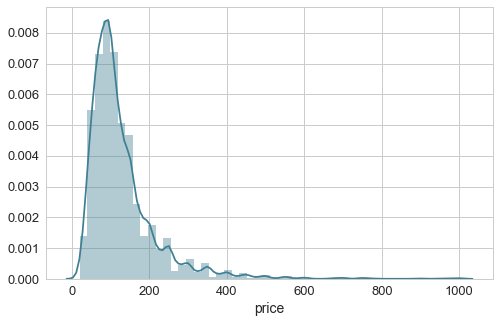

In [7]:
plot_dist(df['price'])

In [8]:
df.describe()

,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,7.482190,9.733106,4.927187,0.365113,3.349398,1.258381,1.307229,1.735202,3.910424,1.672603,1.069932,61.710904,127.976166,3.648245
std,4.791631,6.999140,4.623123,0.541453,1.977599,0.589369,0.882785,1.139393,0.475043,1.311040,0.817084,41.725079,90.250022,1.248588
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,20.000000,0.000000
25%,3.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,35.000000,75.000000,4.000000
50%,6.000000,9.000000,9.000000,0.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,61.710904,100.000000,4.000000
75%,11.000000,15.000000,9.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,65.000000,150.000000,4.000000
max,16.000000,28.000000,16.000000,2.000000,16.000000,8.000000,7.000000,15.000000,4.000000,15.000000,2.000000,300.000000,1000.000000,7.000000


Looks like most of the price is within 200, with mean equals to 127, medium equals to 100. min 20, maximum 1000.

## Assuming that the listing price is most porportional to # accommodates, # bed rooms, # bathrooms and neighbourhood. Let's verify.

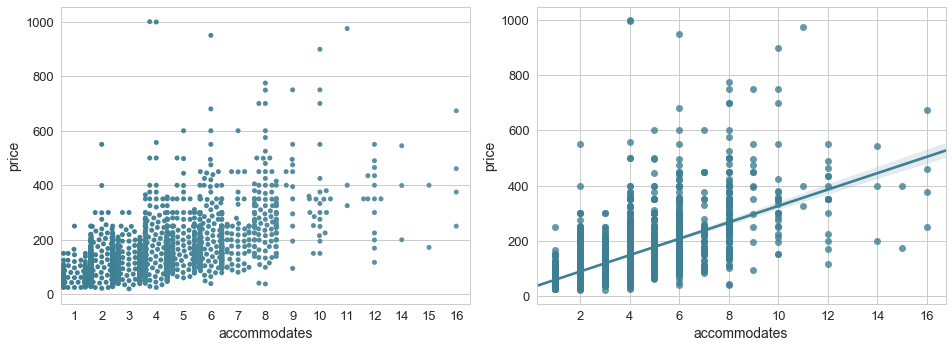

In [9]:
plot_scatter_and_swarm(x = 'accommodates', y = 'price', data = df)

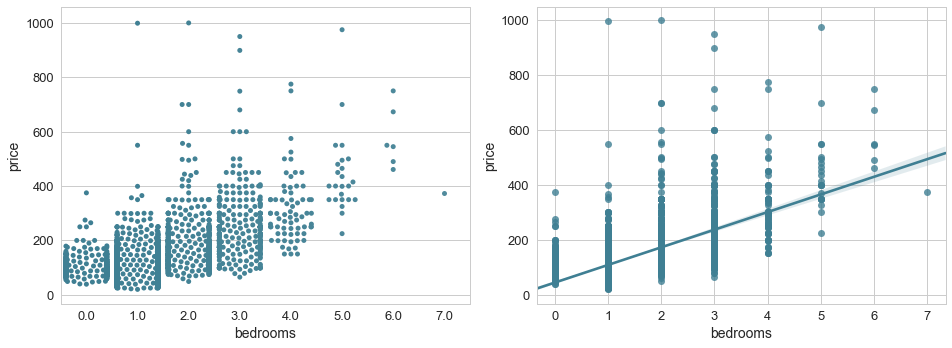

In [10]:
plot_scatter_and_swarm(x = 'bedrooms', y = 'price', data = df)

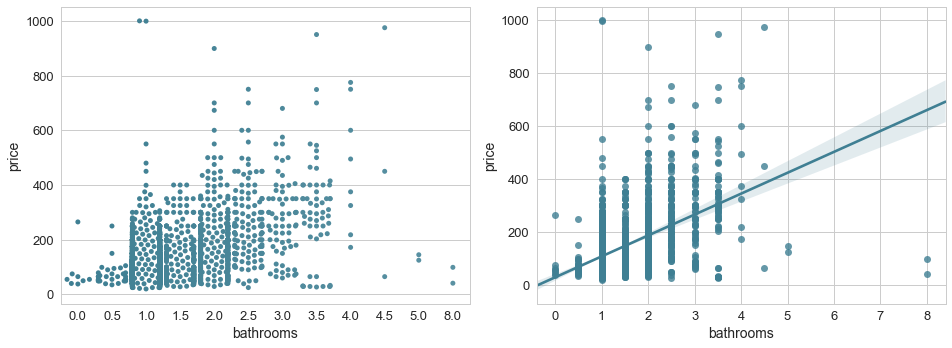

In [11]:
plot_scatter_and_swarm(x = 'bathrooms', y = 'price', data = df)

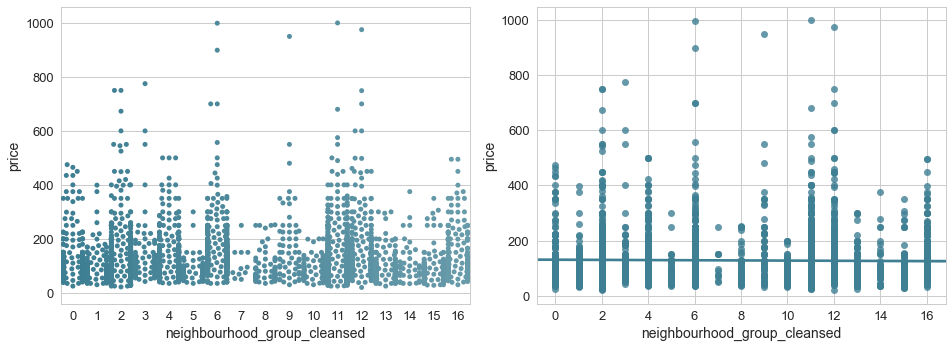

In [12]:
plot_scatter_and_swarm(x = 'neighbourhood_group_cleansed', y = 'price', data = df)

## From the above scatter plots, there is a data point where it has only 1 bedroom but price is high. Let's see if there's anything special.

In [13]:
df[(df.bedrooms == 1) & (df.bathrooms == 1)].sort_values(by = 'price', ascending = False).head()

,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
1208,6,0,0,0,4,1.0,1.0,1.0,4,1,1,85.000000,999.0,4
3436,9,26,0,0,2,1.0,1.0,1.0,4,1,0,61.710904,550.0,4
1760,16,11,9,1,2,1.0,1.0,1.0,4,1,0,61.710904,399.0,0
1498,6,0,0,0,4,1.0,1.0,1.0,4,1,2,45.000000,365.0,4
1701,6,3,0,0,4,1.0,1.0,3.0,4,1,2,150.000000,350.0,4


Look normal though.

## From the above scatter plots, there are some data points with 8 bathrooms but listing price is low. What's other feature that might cause listing price to be lower?

In [14]:
df[df.bathrooms == 8].sort_values(by = 'price', ascending = True).head()

,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
1073,6,0,8,2,8,8.0,1.0,8.0,4,1,0,61.710904,41.0,4
2645,2,1,1,1,2,8.0,1.0,1.0,4,1,1,61.710904,99.0,4


In [15]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/property_type.npy')
print(le.inverse_transform(8))

Dorm


For the 1st data point, might be because its property_type is "Dorm".


For the 2st data point, it can only accommodate 2 people & has only 1 bed room. The price should be dominate by other factors.

## From the scatter plot above, there are data points that can accommodate a lot more but the listing price do not increase linearly. Why?

In [16]:
df[df.accommodates >= 14].sort_values(by = 'price', ascending = False)

,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
2868,2,1,9,0,16,2.0,6.0,9.0,4,13,2,300.0,673.0,4
3577,2,9,9,0,14,3.5,6.0,9.0,4,8,2,150.0,545.0,4
14,12,14,9,0,16,3.5,6.0,15.0,4,8,2,300.0,461.0,4
601,4,16,9,0,15,3.0,5.0,9.0,4,11,2,200.0,400.0,4
2091,1,22,9,0,14,3.0,5.0,9.0,4,5,2,155.0,399.0,1
3351,11,2,9,0,16,4.0,7.0,10.0,4,6,2,300.0,375.0,4
3803,11,2,9,0,16,3.5,4.0,10.0,4,12,1,100.0,250.0,4
2195,13,13,9,0,14,2.0,2.0,3.0,4,3,1,40.0,200.0,2
1200,9,26,9,0,15,4.0,4.0,7.0,4,2,2,150.0,172.0,3


In [17]:
print(le.inverse_transform(9))

House


Looks like these Airbnb are all house. So probably the # accommodates / # bedrooms or # accommodates / # bathrooms ratio are high so listing price is not increasing linearly.

## From the scatter plot above, looks like most of the Airbnb can accommodate 2 ~ 6 people, have 1 ~ 3 bedrooms & 1 ~ 2 bathrooms. Let's confirm

In [18]:
df.groupby(["accommodates", "bedrooms", "bathrooms"]).size().reset_index(name = "Count").sort_values(by = "Count", ascending = False).head(10)

,accommodates,bedrooms,bathrooms,Count
16,2,1.0,1.0,1178
41,4,1.0,1.0,397
30,3,1.0,1.0,293
12,2,0.0,1.0,245
3,1,1.0,1.0,190
45,4,2.0,1.0,185
17,2,1.0,1.5,106
79,6,2.0,1.0,90
81,6,2.0,2.0,68
47,4,2.0,2.0,56


Yes looks like 1 bedroom 1 bathroom Airbnbs which can accommodate 1 ~ 4 people are most common.

## Some follow up questions

## As we saw that dorm property type seems to have lower price. Double check would property type affect listing price?

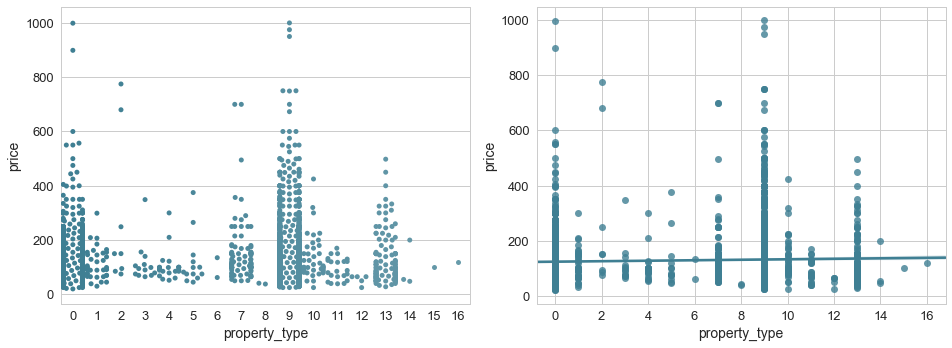

In [19]:
plot_scatter_and_swarm(x = 'property_type', y = 'price', data = df)

Yes property type is correlated with price. And most of the property type of Seattle Airbnb is 0 & 9 (after encoding).
Let's confirm by count plot.

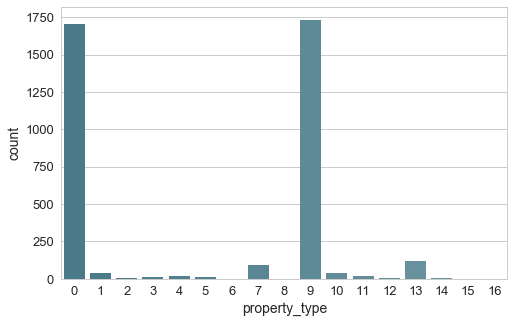

In [20]:
plot_count_plot(df, 'property_type')

In [21]:
nlargest_indexes = df['property_type'].value_counts().nlargest(2).index.values

In [22]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/property_type.npy')
print(le.inverse_transform(nlargest_indexes))

['House' 'Apartment']


Yes property type 0 & 9, which are house & apartment, respectively, are most common property type for Seattle Airbnb.

## As we saw, there were not many Airbnb that can accommodate more than 10 people. Might be related to Seattle is a metropolis. Let's check which neighbourhood has more Airbnb that can accommodate more than 10 people.

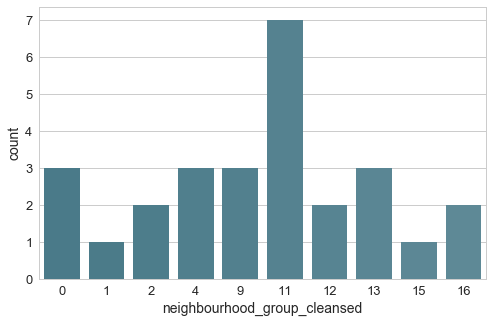

In [23]:
plot_count_plot(df[df['accommodates'] > 10], 'neighbourhood_group_cleansed')

In [24]:
nlargest_indexes = df[df['accommodates'] > 10]['neighbourhood_group_cleansed'].value_counts().nlargest(5).index.values

In [25]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/neighbourhood_group_cleansed.npy')
print(le.inverse_transform(nlargest_indexes))

['Other neighborhoods' 'Rainier Valley' 'Magnolia' 'Central Area' 'Ballard']


Rainier Valley, Magnolia, Central Area and Ballard have more Airbnbs that can accommodate more than 10 people.

## As we saw 1 bedroom 1 bathroom property is most common in Seattle. Where do they usually located?

In [26]:
df_cnt_1_1_neighbourhood = df[(df.bedrooms == 1) & (df.bathrooms == 1)].groupby(['neighbourhood_group_cleansed']).size().reset_index(name = "Count").sort_values(by = "Count", ascending = False)
total_1_1 = sum(df_cnt_1_1_neighbourhood['Count'])
df_cnt_1_1_neighbourhood['neighbourhood_group_cleansed_pct'] = df_cnt_1_1_neighbourhood['Count'].map(lambda x: x / total_1_1)
df_cnt_1_1_neighbourhood.head(5)

,neighbourhood_group_cleansed,Count,neighbourhood_group_cleansed_pct
11,11,434,0.205201
2,2,306,0.144681
6,6,293,0.138534
4,4,183,0.086525
12,12,168,0.079433


In [27]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/neighbourhood_group_cleansed.npy')
nlargest_indexes = df_cnt_1_1_neighbourhood['neighbourhood_group_cleansed_pct'].nlargest(3).index.values
print(le.inverse_transform(nlargest_indexes))

['Other neighborhoods' 'Capitol Hill' 'Downtown']


Other than 'Other neighborhoods', about 27% of the 1 bed room 1 bath room Airbnb in Seattle are in Capitol Hill & Downtown.